In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Find location to put data
import os
PERSISTENT_BUCKET = os.environ['PERSISTENT_BUCKET']

In [2]:
PERSISTENT_BUCKET = 'gs://leap-persistent/dhruvbalwada'

In [3]:
ds_unfiltered = xr.open_zarr(PERSISTENT_BUCKET+'/ssh_reconstruction_project/unfiltered_data.zarr')
ds_filtered = xr.open_zarr(PERSISTENT_BUCKET+'/ssh_reconstruction_project/filtered_data.zarr')

In [9]:
ds_ITs = ds_unfiltered['ssh_unfiltered'] - ds_filtered['ssh_filtered']

In [14]:
ds_ITs.isel(time=0)

<xarray.DataArray (i: 2160, j: 2160)>
dask.array<getitem, shape=(2160, 2160), dtype=float32, chunksize=(270, 270), chunktype=numpy.ndarray>
Coordinates: (12/15)
    Depth    (j, i) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    RAC      (j, i) float32 1.553e+06 1.553e+06 1.552e+06 ... 3.939e+06 3.94e+06
    XC       (j, i) float32 -15.49 -15.47 -15.45 -15.43 ... 29.45 29.47 29.49
    YC       (j, i) float32 -57.0 -57.0 -57.0 -57.0 ... -26.66 -26.66 -26.66
    face     int64 1
  * i        (i) int64 1080 1081 1082 1083 1084 ... 3235 3236 3237 3238 3239
    ...       ...
    time     timedelta64[ns] 4 days 18:00:00
    x        (j, i) float32 -15.49 -15.47 -15.45 -15.43 ... 29.45 29.47 29.49
    x0       (i) float64 -15.49 -15.47 -15.45 -15.43 ... 29.43 29.45 29.47 29.49
    y        (j, i) float32 -57.0 -57.0 -57.0 -57.0 ... -26.66 -26.66 -26.66
    y0       (j) float64 -57.0 -56.99 -56.98 -56.97 ... -26.69 -26.68 -26.66
    z0       float64 -0.5

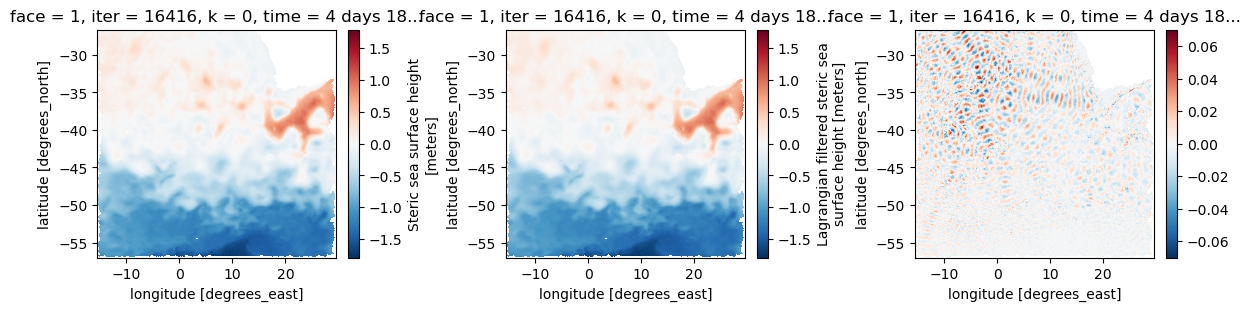

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3), constrained_layout=True)
ds_unfiltered['ssh_unfiltered'].isel(time=0).plot(x='x0', y='y0', ax=axes[0])
ds_filtered['ssh_filtered'].isel(time=0).plot(x='x0', y='y0',ax=axes[1])
ds_ITs.isel(time=0).plot(x='x0', y='y0',ax=axes[2])
plt.show()